In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
#Loading the dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Preprocessing

In [4]:
# Detecting missing values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
#handling missing values
data.dropna(inplace=True)

In [6]:
#remove outliers
#we are using z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [7]:
#scaling the feature
scaler = StandardScaler()
scaled_data= scaler.fit_transform(data)

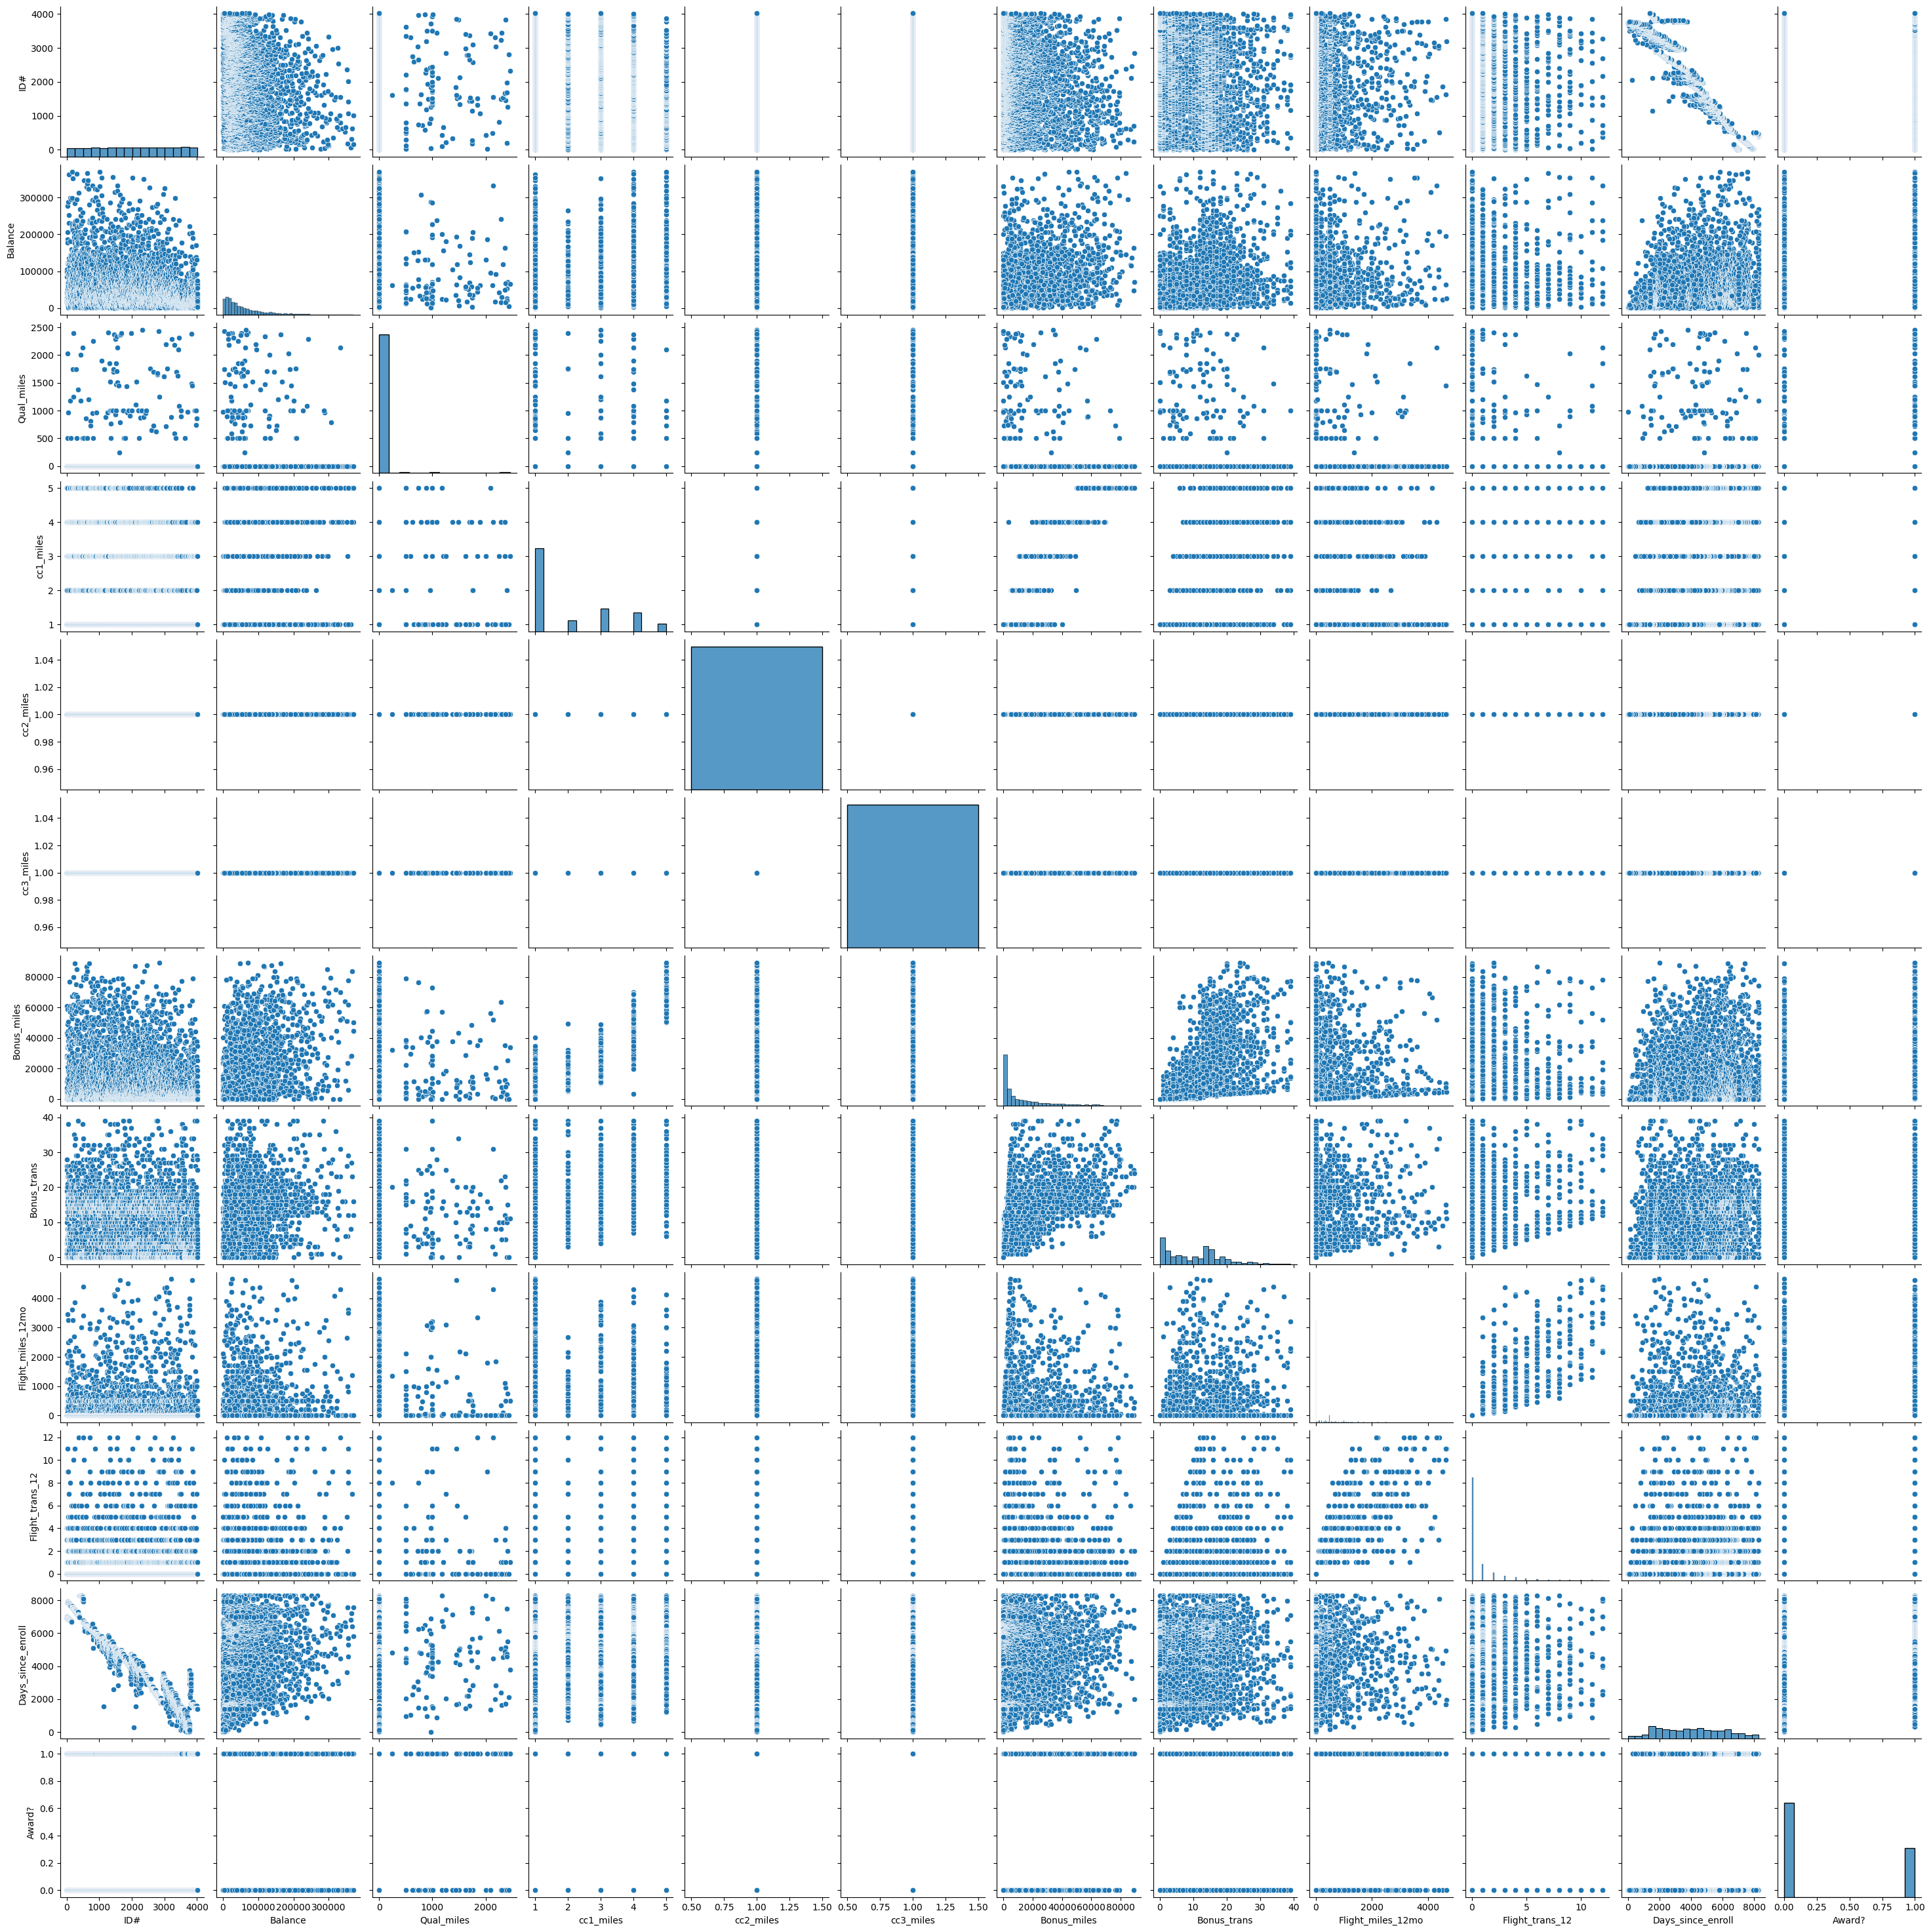

In [8]:
#doing visualization to understand the hidden patterns in the dataset
#we can use pairplot to understand relationship pairwise
sns.pairplot(data)
plt.show()

## Implementing Clustering Algorithms

**KMeans Clustering**

In [9]:
#finding optimal number of clustering using elbow method
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

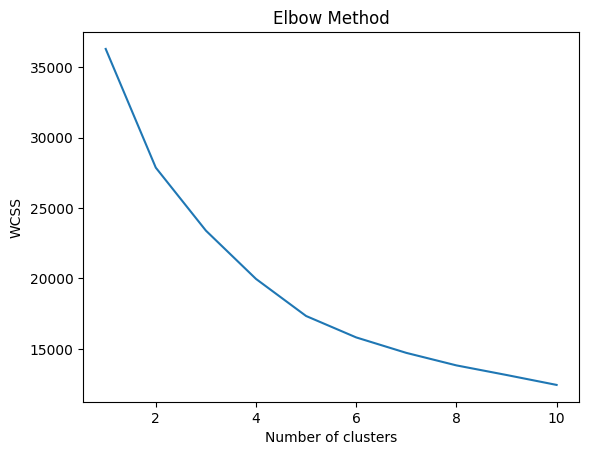

In [10]:
#Plot the elbow curve
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
## Based on elbow curve, we can chose the optimal number of clusters andfit k-means
optimal_k=3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Hierarchial Clustering**

In [12]:
agglomerative  = AgglomerativeClustering(n_clusters=optimal_k, linkage = 'ward')
agglomerative_labels = agglomerative.fit_predict(scaled_data)

**DBSCAN**

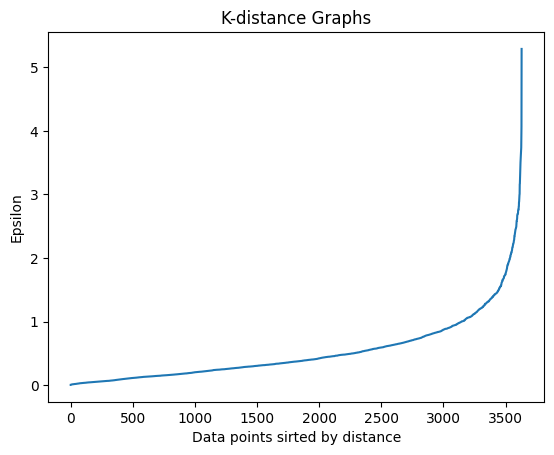

In [13]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances, indices = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graphs')
plt.xlabel('Data points sirted by distance')
plt.ylabel('Epsilon')
plt.show()

In [14]:
#based on K-dustance graph choose epsilon
epsilon=0.6
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels= dbscan.fit_predict(scaled_data)

In [15]:
dbscan_labels

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

## Visualization

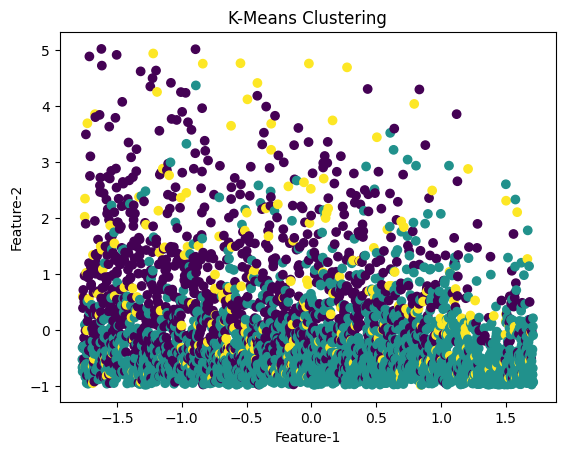

In [16]:
#Plotting cluster using scatter plot
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

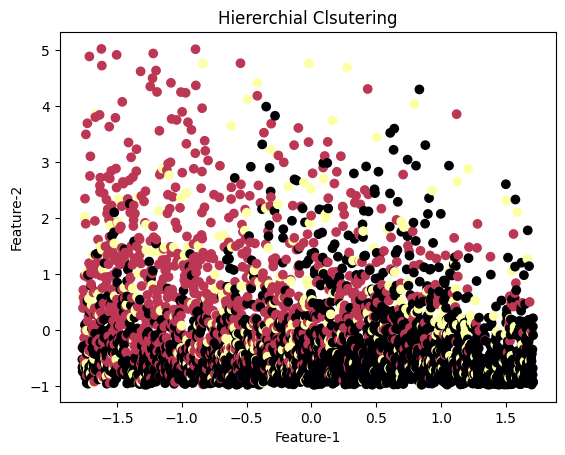

In [17]:
## Plotting Scatter plot for hierarchial clustering
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=agglomerative_labels, cmap='inferno')
plt.title("Hiererchial Clsutering")
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

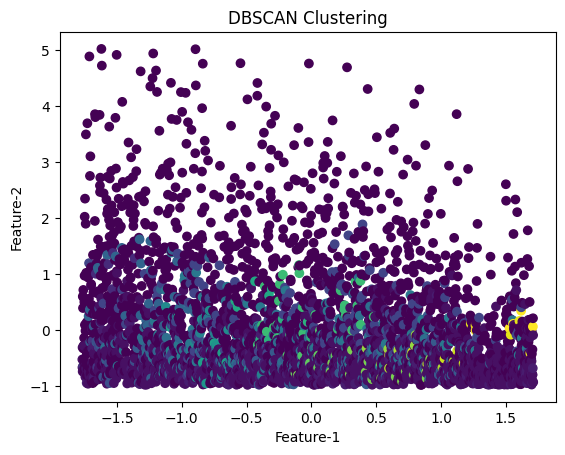

In [18]:
##plotting scatter plot for DBSACN Clustering
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

## Evaluation and Performance Metrics

In [19]:
# Silhoutte score for DBSCAN
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: -0.3473549269206878


In [20]:
# Silhouette score for Hierarchical Clustering
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:", agglomerative_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.26359050526851413


In [21]:
# Silhouette score for kmeans clustering
kmeans_silhouette_score  = silhouette_score(scaled_data, kmeans_labels)
print("KMeans Clustering Score:", kmeans_silhouette_score)

KMeans Clustering Score: 0.29208662652066236
